In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DDWZurnDTIYZsu3j5iZ8")
project = rf.workspace("objectdetection-dxeuw").project("face-detection-z1x9s")
version = project.version(1)
dataset = version.download("yolov8")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to face-detection-1 in yolov8:: 100%|██████████| 10111/10111 [00:01<00:00, 7210.20it/s]


In [2]:
text="""
names:
- Face
- face
nc: 2
roboflow:
  license: CC BY 4.0
  project: face-detection-z1x9s
  url: https://universe.roboflow.com/objectdetection-dxeuw/face-detection-z1x9s/dataset/1
  version: 1
  workspace: objectdetection-dxeuw
val: /kaggle/working/face-detection-1/test/images
train: /kaggle/working/face-detection-1/train/images
"""

In [4]:
def text2file(text,filepath):
    with open(filepath,'w')as file:
        file.write(text)
        
text2file(text,'output.yaml')        

In [5]:
! pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [6]:
! yolo task=detect mode=train data='/kaggle/working/output.yaml' model=yolov10s.pt epochs=50 imgsz=640 batch=16

100%|███████████████████████████████████████| 15.9M/15.9M [00:00<00:00, 106MB/s]
Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/kaggle/working/output.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s

In [7]:
from IPython.display import Image, display

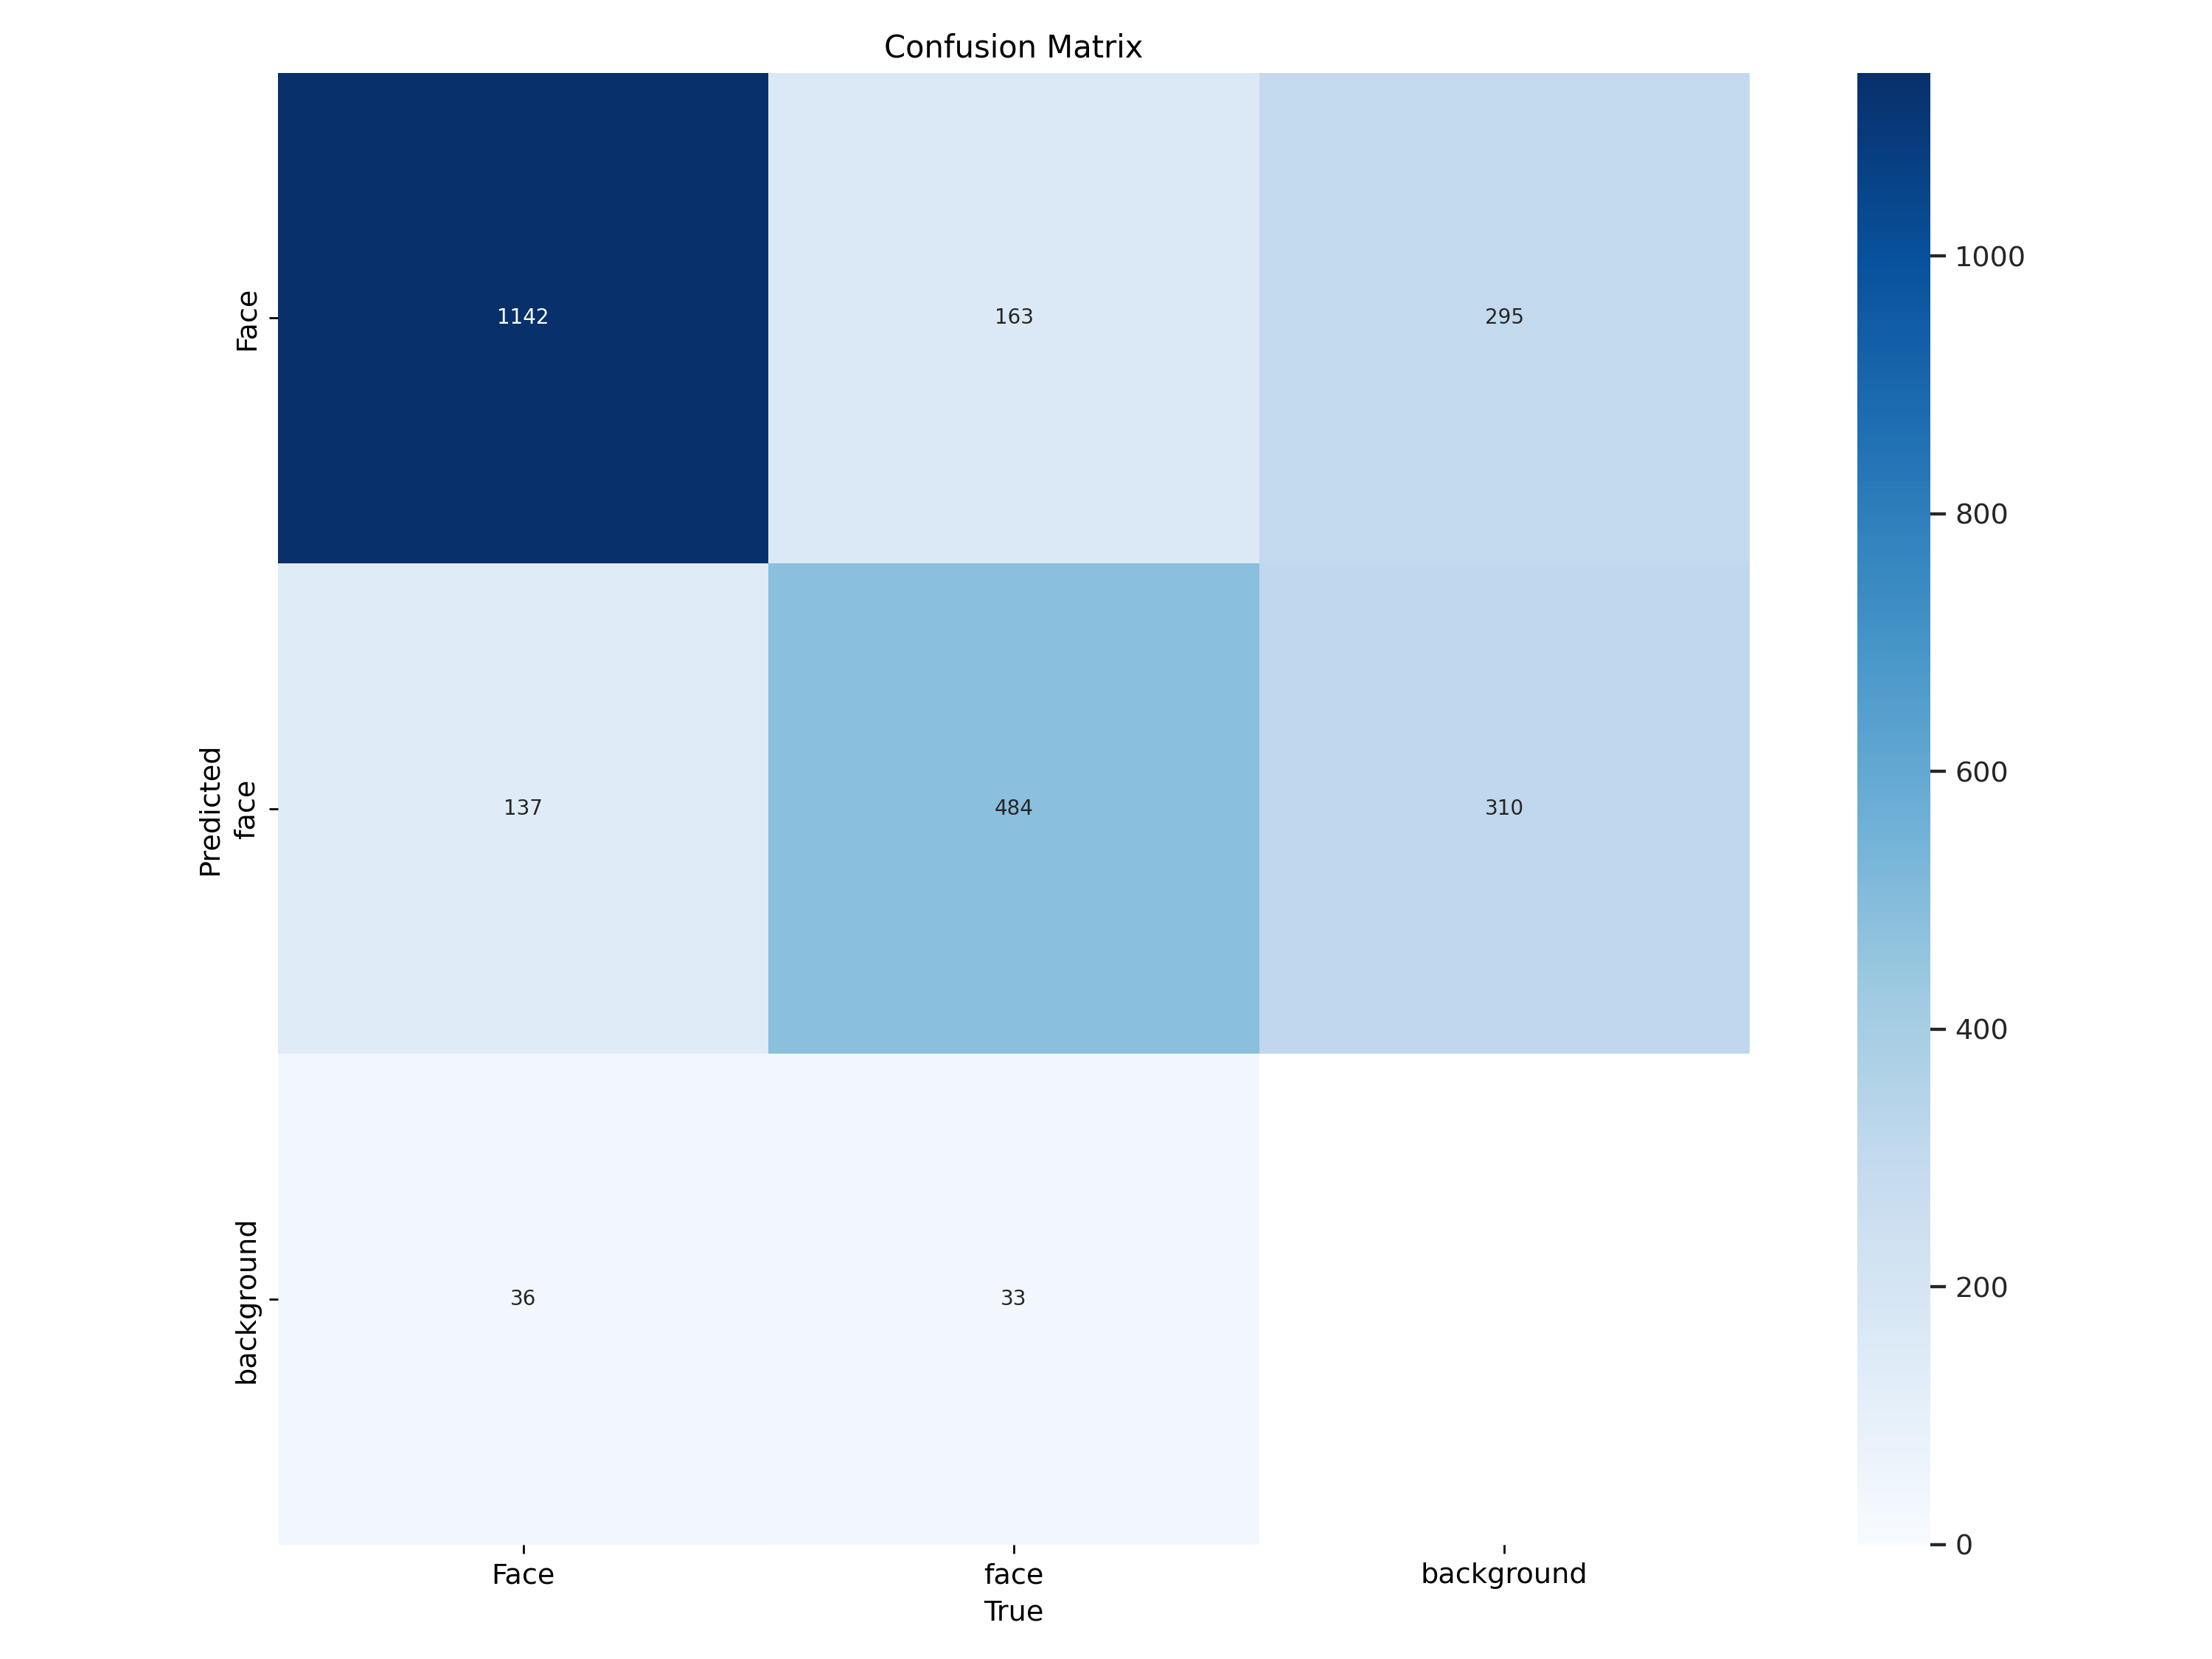

In [9]:
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png"))

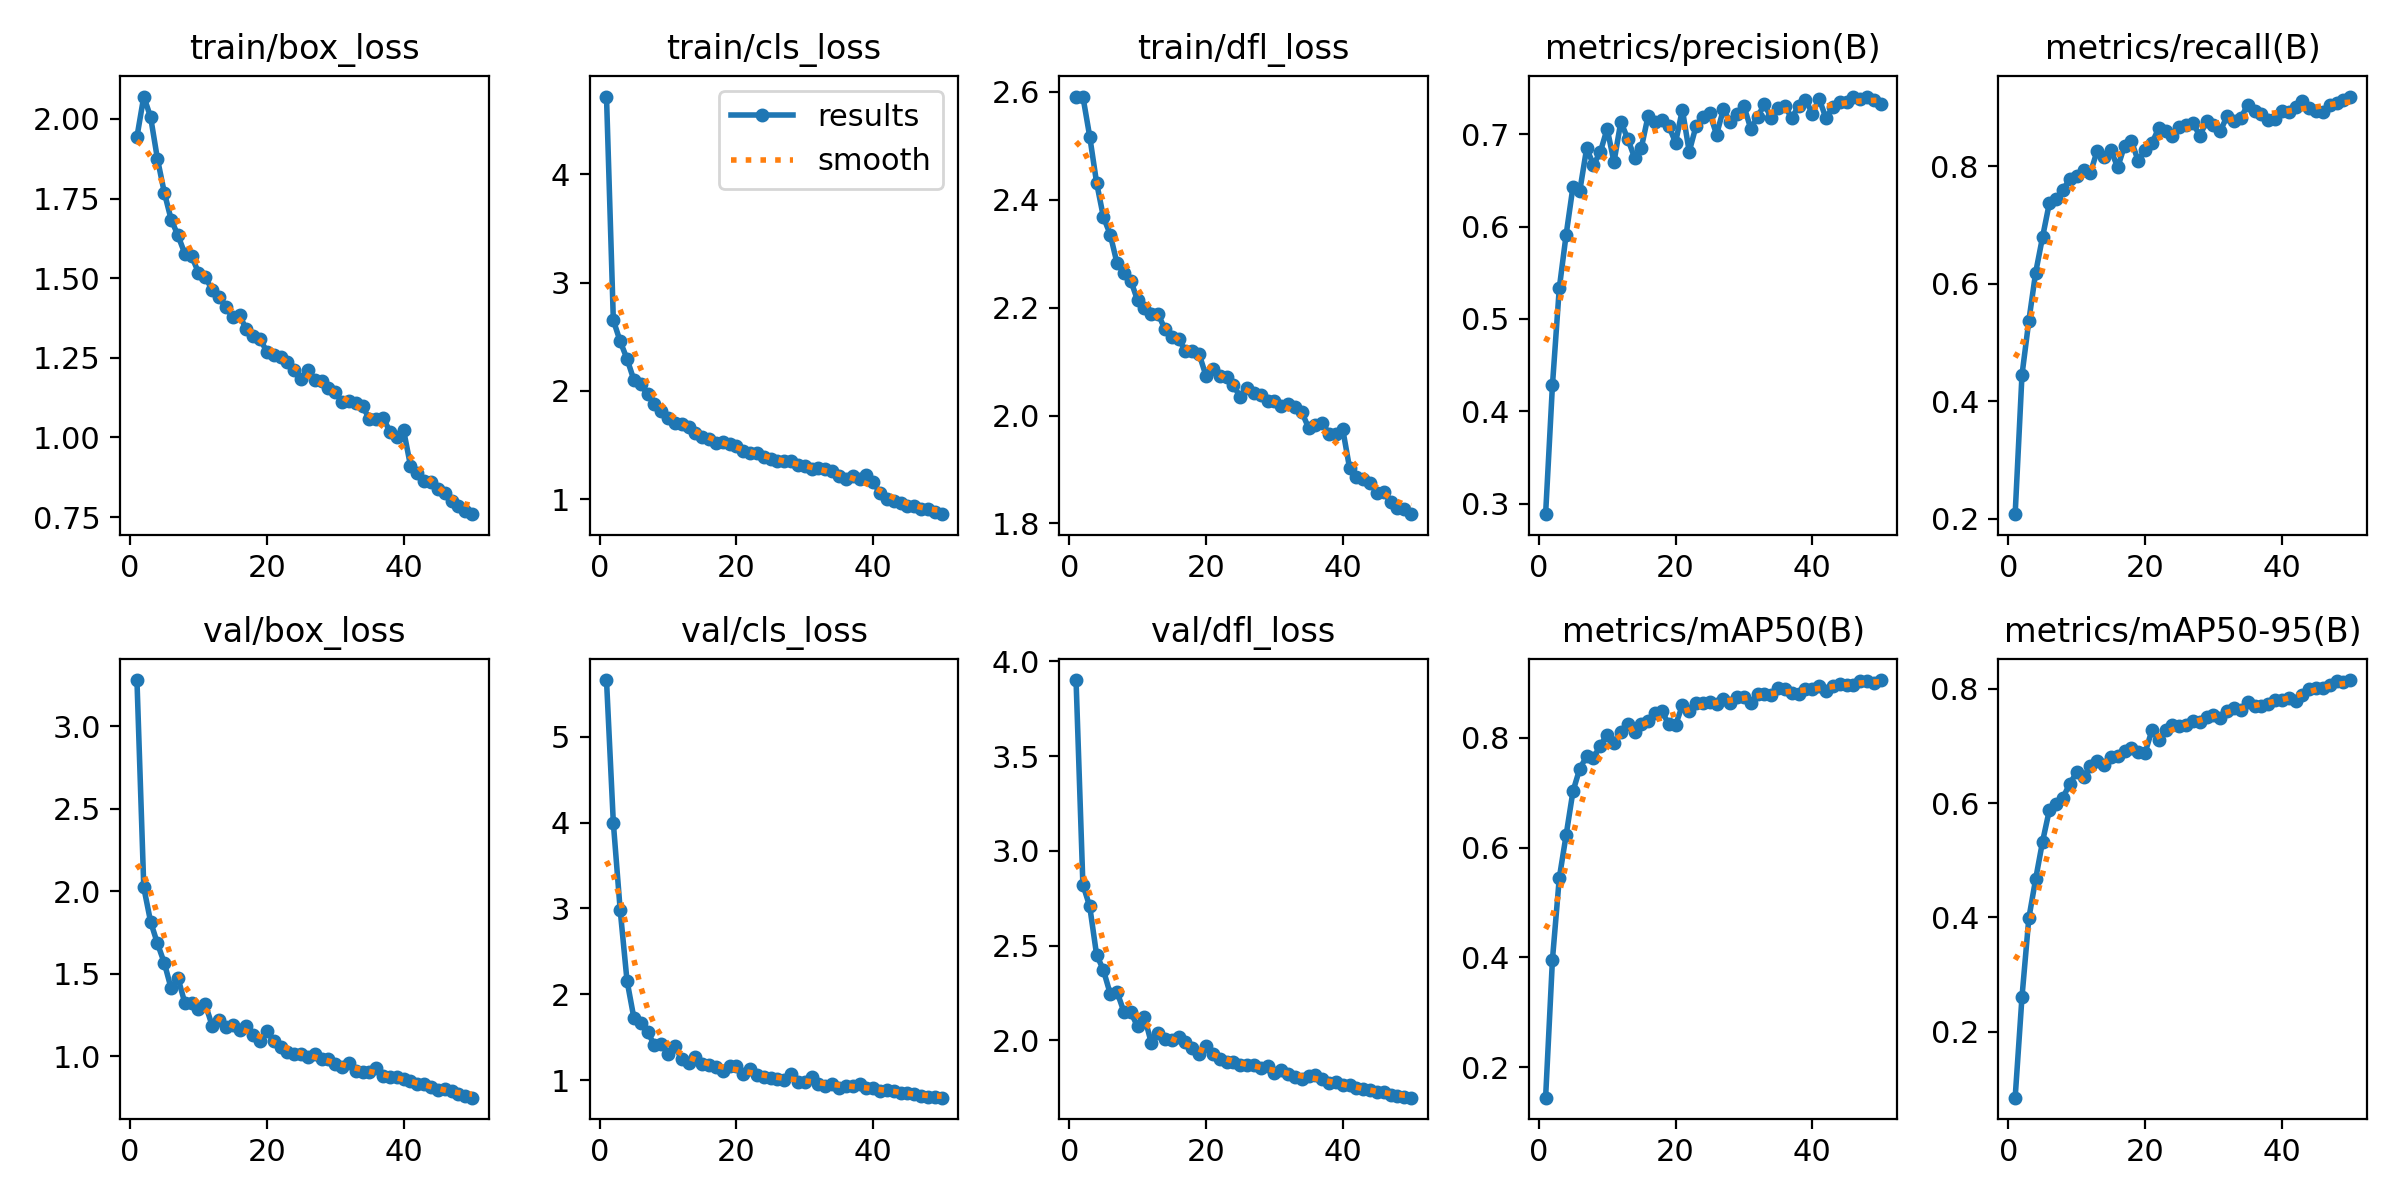

In [11]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png"))

In [13]:
! yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 source=/kaggle/working/face-detection-1/test/images

Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 293 layers, 8,036,508 parameters, 0 gradients, 24.4 GFLOPs

image 1/1513 /kaggle/working/face-detection-1/test/images/0_10725_jpg.rf.2211d1905defbdf8df9fe13f2191bc86.jpg: 640x640 3 Faces, 17.1ms
image 2/1513 /kaggle/working/face-detection-1/test/images/0_10725_jpg.rf.a2a7ce9d20e47c441ed87e73b35741a4.jpg: 640x640 4 Faces, 17.1ms
image 3/1513 /kaggle/working/face-detection-1/test/images/101_jpg.rf.13a210b8f1b51dc497bb936285ae72b4.jpg: 640x640 1 Face, 17.1ms
image 4/1513 /kaggle/working/face-detection-1/test/images/101_jpg.rf.4b93ceef452f206105e769dd650cd6b9.jpg: 640x640 1 Face, 17.0ms
image 5/1513 /kaggle/working/face-detection-1/test/images/101_jpg.rf.4f1bac551eface241ef0d8b8de2c84b9.jpg: 640x640 1 face, 17.1ms
image 6/1513 /kaggle/working/face-detection-1/test/images/101_jpg.rf.cb35b5f23de677941f6acb4b329836ab.jpg: 640x640 1 face, 17.0ms
image 7/1513 /kaggle/working/face-detection-1/te

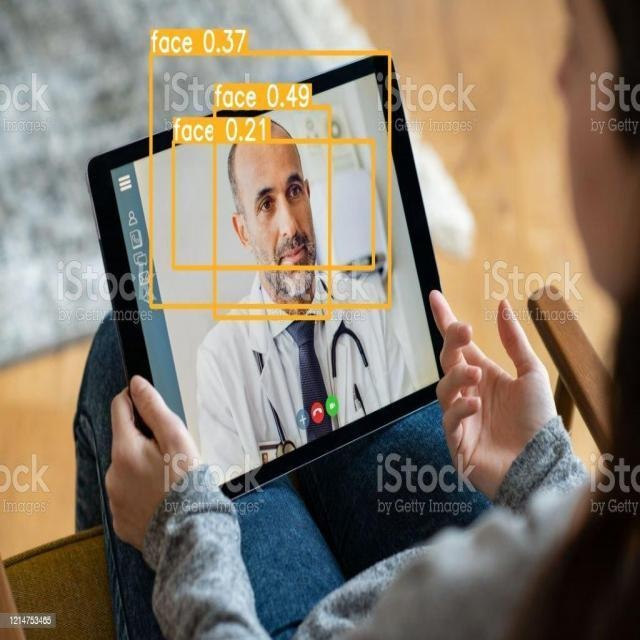

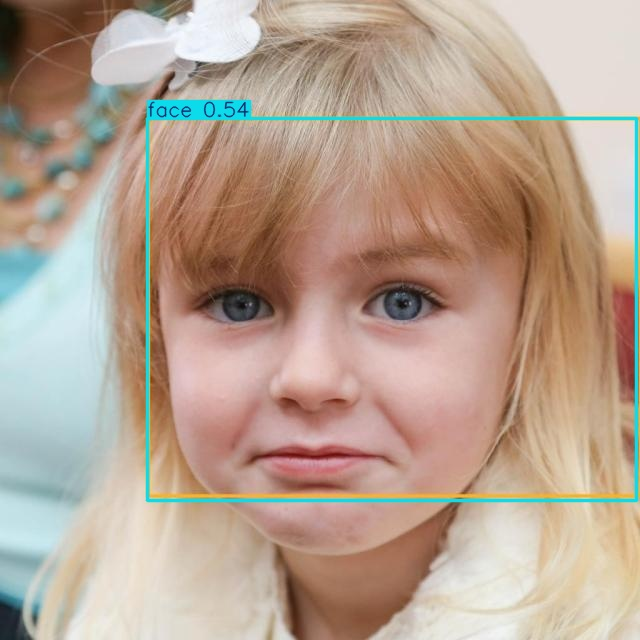

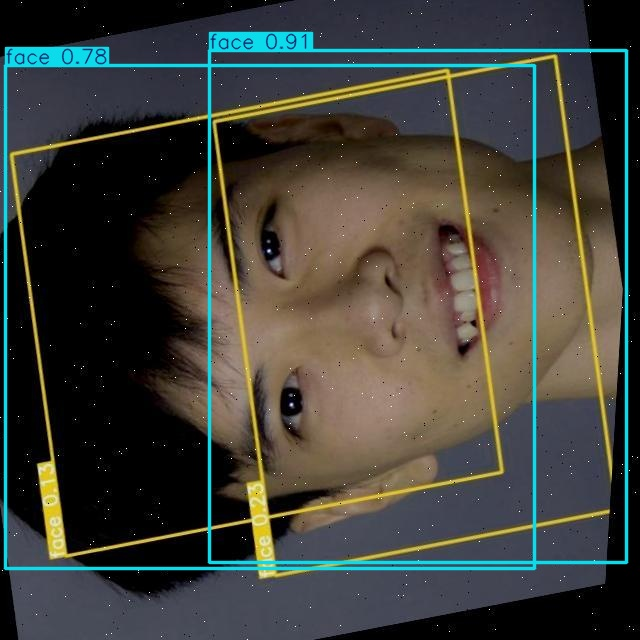

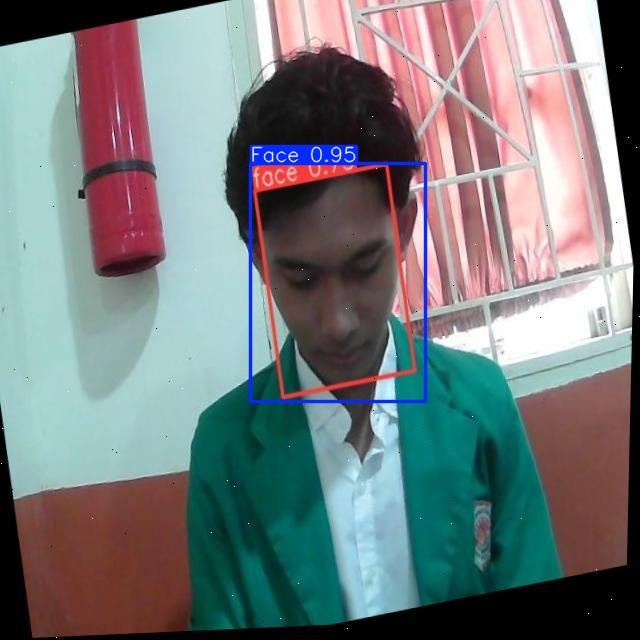

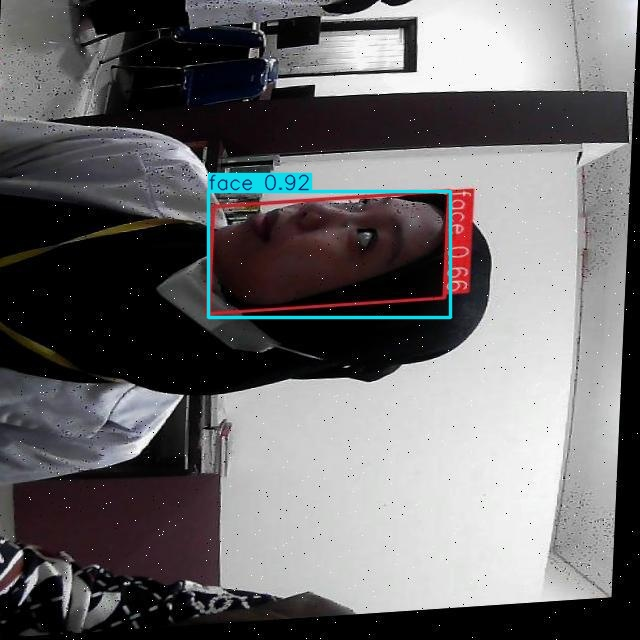

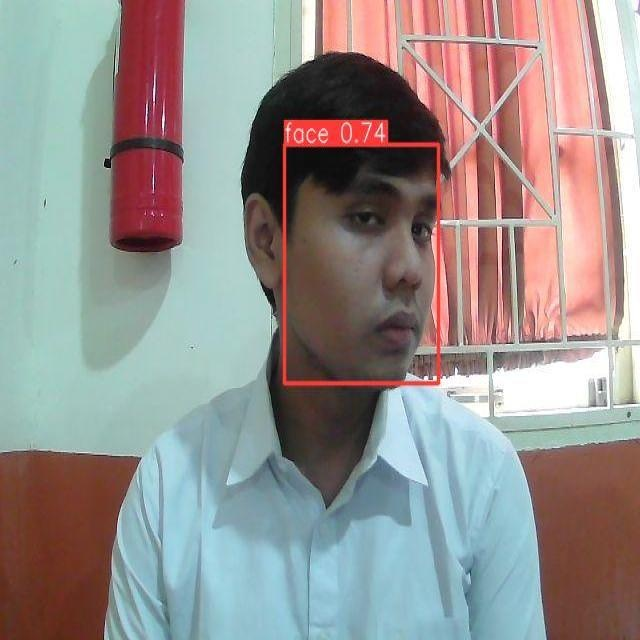

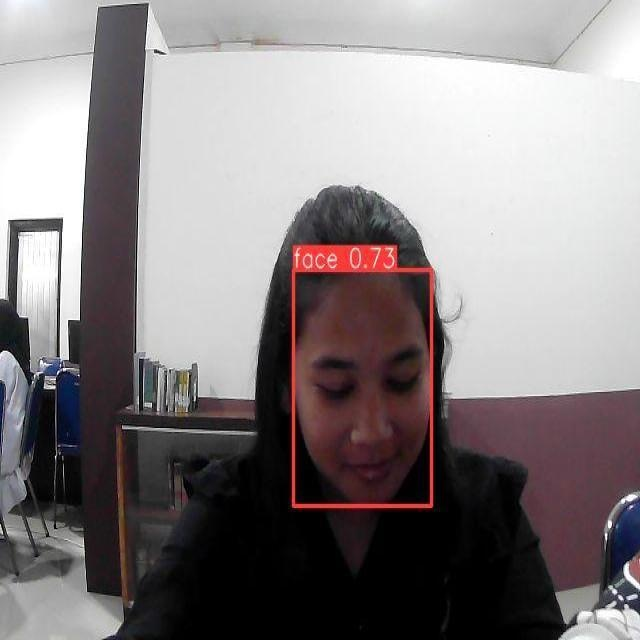

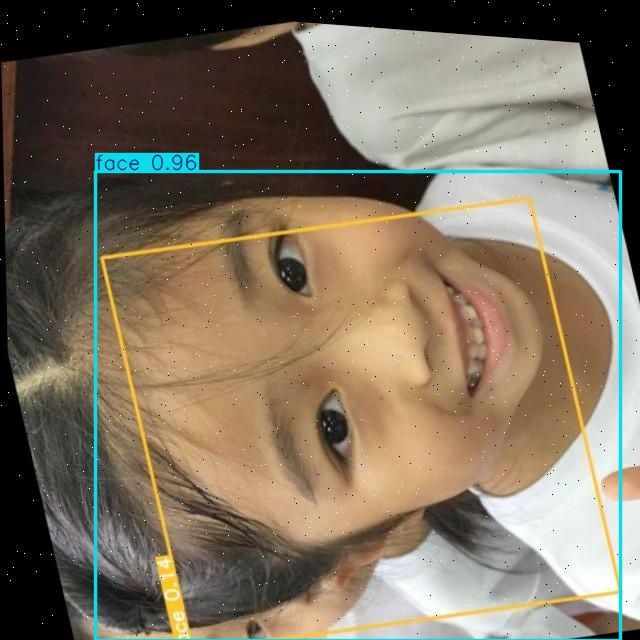

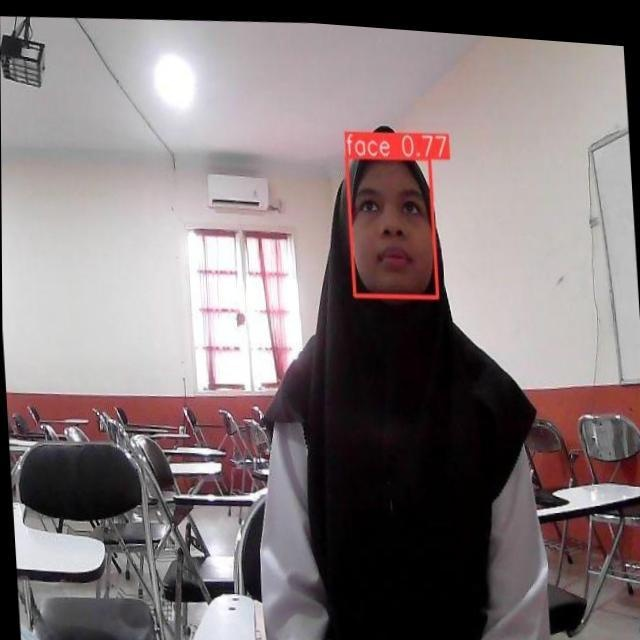

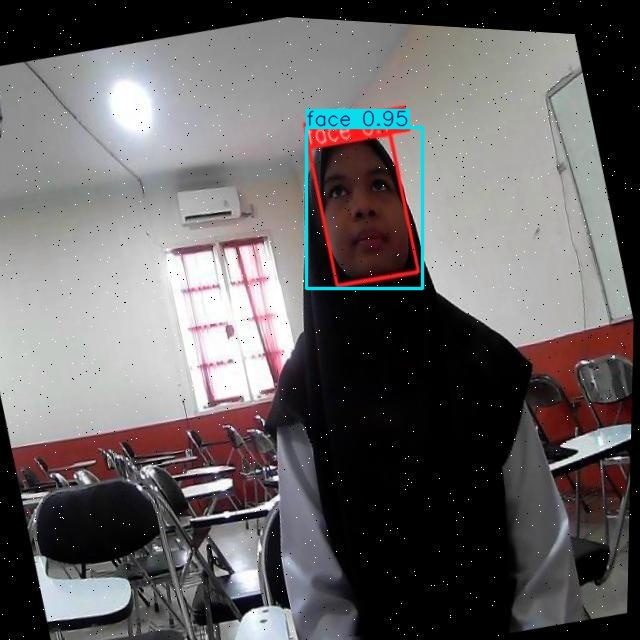

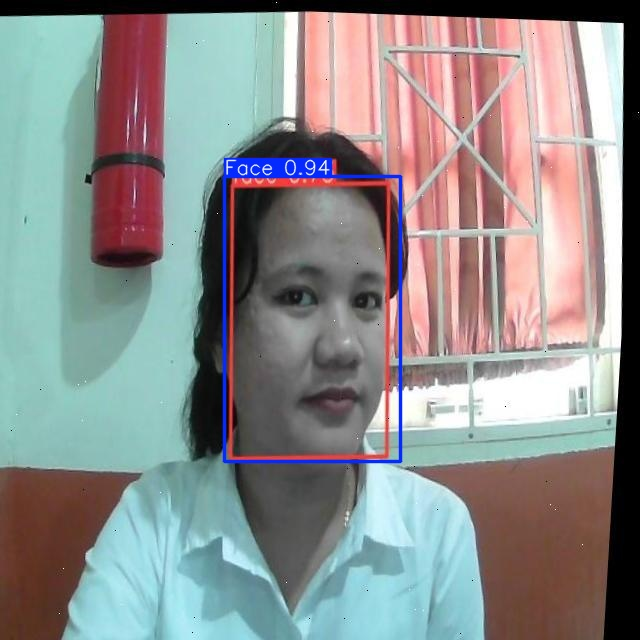

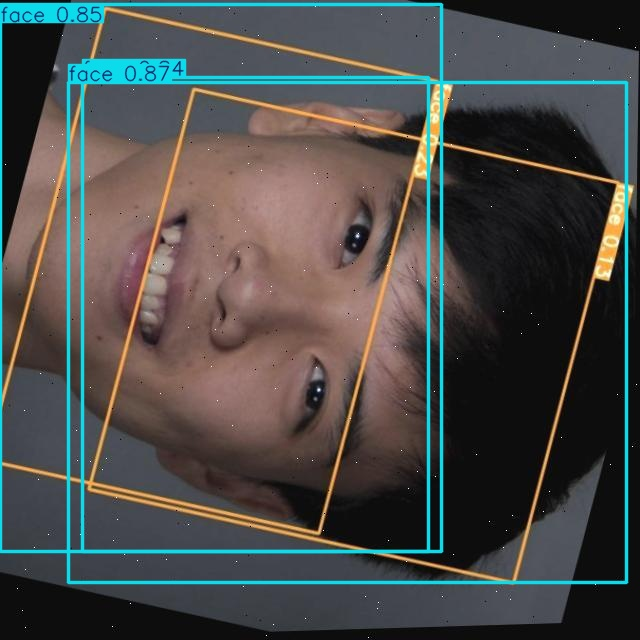

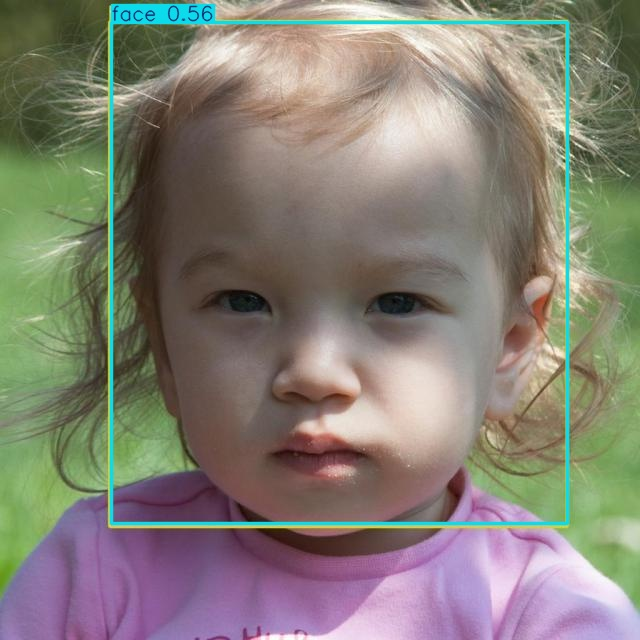

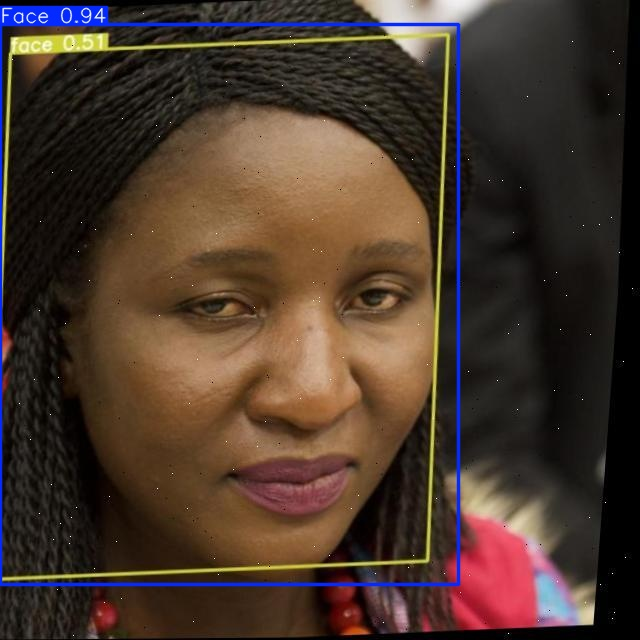

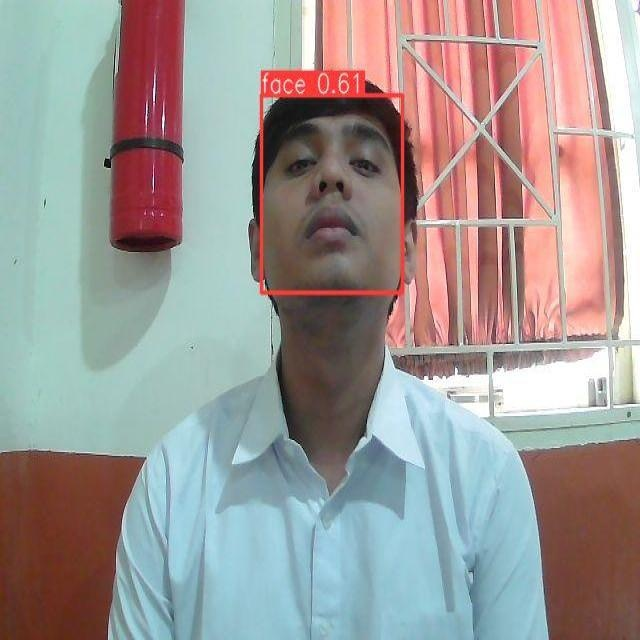

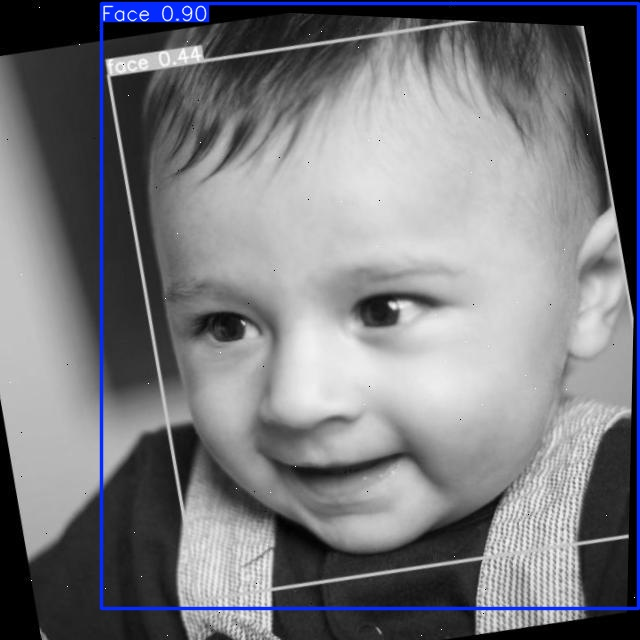

<Figure size 2000x2000 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/kaggle/working/runs/detect/predict2/*.jpg"): #assuming JPG
    if i %100 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1